# Developing an Income Classifier System for individuals

## Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [4]:
#Importing data
data_income=pd.read_csv('income.csv')
print(data_income)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [5]:
#Creating a copy of the original data
data=data_income.copy()

## Exploratory Data Analysis

In [6]:
#Getting to know the data
print(data.info()) #To check variables data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [7]:
#Checking for the missing values
print(data.isnull())

         age  JobType  EdType  maritalstatus  occupation  relationship   race  \
0      False    False   False          False       False         False  False   
1      False    False   False          False       False         False  False   
2      False    False   False          False       False         False  False   
3      False    False   False          False       False         False  False   
4      False    False   False          False       False         False  False   
...      ...      ...     ...            ...         ...           ...    ...   
31973  False    False   False          False       False         False  False   
31974  False    False   False          False       False         False  False   
31975  False    False   False          False       False         False  False   
31976  False    False   False          False       False         False  False   
31977  False    False   False          False       False         False  False   

       gender  capitalgain 

In [8]:
print("Data columns with null values: \n",data.isnull().sum())

Data columns with null values: 
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [9]:
#Summary of numerical variables
summary_sum=data.describe()
print(summary_sum)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
#Summary of categorical variables
summary_cate=data.describe(include='O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [11]:
#Frequency of each category
print(data['JobType'].value_counts())
print(data['occupation'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


In [12]:
#Checking for unique values
print(np.unique(data['JobType']))
print(np.unique(data['occupation'])) #There exists '?' instead of nan

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [13]:
#Go back and read data by including "na_values['?']" to consider '?' as nan
data=pd.read_csv('income.csv',na_values=['?'])

In [14]:
#Data preprocessing
print(data.isnull().sum())


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [15]:
missing=data[data.isnull().any(axis=1)]
#axis=1 to consider at least one column is missing

In [16]:
data2=data.dropna(axis=0) #dropping the rows with missing values

In [17]:
#Relationship between independent variables
correlation=data2.corr()

## Cross table and Data Visualization

In [18]:
#Extracting the column names
print(data2.columns)

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')


In [19]:
#Gender proportion table
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.331728
 Male    0.668272


In [20]:
#Gender vs Salary Status
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


/home/techie/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


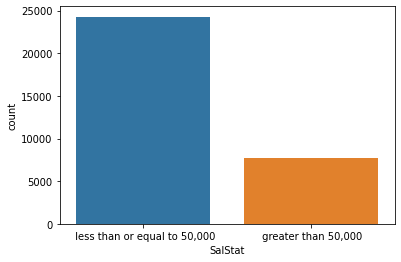

In [21]:
#Frequency Distribution of Salary Status
SalStat=sns.countplot(data2['SalStat'])

/home/techie/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

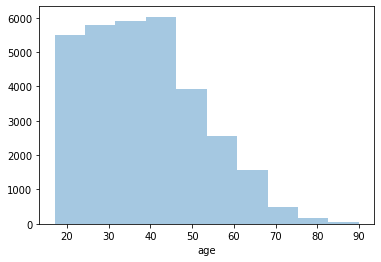

In [22]:
#Histogram of age
sns.distplot(data2['age'],bins=10,kde=False)
#People with age 20-45 are high in frequency

/home/techie/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

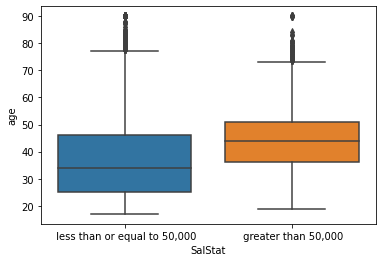

In [23]:
#Box Plot - Age vs Salary Status
sns.boxplot('SalStat','age',data=data2)
data2.groupby('SalStat')['age'].median()

## Logistic Regression

In [24]:
#Reindexing the salary status names to 0,1
#data2['SalStat']=data2['SalStat'].map({'less than or equal to 50,000':0,'greater than 50,000':1})
data2['SalStat']=np.where(data2['SalStat'].str.contains('less than or equal to 50,000'),0,1)
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [25]:
#Dummy Analysis
new_data=pd.get_dummies(data2,drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Federal-gov  JobType_ Local-gov  JobType_ Never-worked  \
0                         0                   0                      0   
1                         1                   0                      0   
2                    

In [26]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupati

In [27]:
#Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ Preschool', 'occupation_ Tech-support', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Puerto-Rico', 'nativecountry_ Guatemala', 'maritalstatus_ Married-civ-spouse', 'nativecountry_ Peru', 'JobType_ Self-emp-not-inc', 'EdType_ Bachelors', 'capitalloss', 'nativecountry_ Canada', 'nativecountry_ Haiti', 'maritalstatus_ Married-AF-spouse', 'occupation_ Craft-repair', 'EdType_ Masters', 'nativecountry_ United-States', 'nativecountry_ Cuba', 'nativecountry_ Hungary', 'nativecountry_ Italy', 'relationship_ Other-relative', 'occupation_ Other-service', 'EdType_ 11th', 'occupation_ Sales', 'maritalstatus_ Separated', 'relationship_ Unmarried', 'JobType_ Self-emp-inc', 'nativecountry_ England', 'nativecountry_ Mexico', 'EdType_ Prof-school', 'age', 'occupation_ Exec-managerial', 'nativecountry_ Thailand', 'EdType_ 1st-4th', 'nativecountry_ Jamaica', 'occupation_ Transport-moving', 'nativecountry_ Scotland', 'EdType_ Doctorate', 'gender_ Male', 'maritalstatus_ Never-married', 'Ed

In [28]:
#Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [29]:
#Storing the values from input features
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [30]:
#Splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)


In [31]:
#Make an instance of the Model
logistic=LogisticRegression()


In [32]:
#Fitting the values of x and y
logistic.fit(train_x,train_y)
print(logistic.coef_)
print(logistic.intercept_)
 

[[-3.65429716e-02  2.00640619e-01 -1.07012037e-03 -5.13909803e-02
  -2.46531839e-02  1.06887616e+00 -1.35437088e-02 -5.70466331e-01
   7.30501925e-01  5.29975168e-04 -1.53236371e-03 -2.01687563e-02
   2.13348495e-02 -3.50948551e-01  6.67695176e-01 -3.21035503e-01
  -1.76589683e-02 -1.16333520e-04 -4.57784054e-03 -3.17938048e-01
  -7.98360304e-01 -4.26862019e-01  2.53163041e-01 -2.04779920e-01
  -6.82981684e-01  2.00648127e-01  1.23825009e-03 -3.81745189e-01
   3.09730198e-01  4.78436217e-04  1.02690315e+00 -9.09486508e-03
  -1.00641209e-01 -3.03597760e-02 -2.16629926e-01 -4.07412758e-03
   3.03976053e-01  7.21096976e-02 -1.42467473e+00 -2.41268999e-05
  -4.61518807e-03 -2.28300926e-02 -4.71833290e-02 -3.08799035e-01
  -2.95301541e-01 -1.12141688e+00 -4.89060795e-02 -1.16685596e-02
  -4.11999513e-01 -8.80419230e-03 -3.50068070e-03  3.31490672e-01
  -3.49883669e-02 -4.37997526e-01  1.33199378e-02 -6.46334369e-03
  -1.00497100e+00 -1.89700495e-02 -2.52867712e-01 -5.56000098e-02
  -1.39074

/home/techie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#Prediction from test data
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [34]:
#Confusion matrix
confusion_matrix1=confusion_matrix(test_y,prediction)
print(confusion_matrix1)

[[6827  509]
 [ 932 1326]]


In [35]:
#Calculating the accuracy
accuracy_score1=accuracy_score(test_y,prediction)
print(accuracy_score1)

0.8498019595580572


In [36]:
#Printing misclassified values from prediction
print("Misclassified samples : %d " % (test_y!=prediction).sum())

Misclassified samples : 1441 


### Logistic Regression - Removing insignificant variables

In [37]:
#Reindexing the salary status names to 0,1
#data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
#data2['SalStat']=np.where(data2['SalStat'].str.contains('less than or equal to 50,000'),0,1)

#print(data2['SalStat'])

In [38]:
cols=['gender','nativecountry','race','JobType']
new_data=data2.drop(cols,axis=1)

In [39]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [40]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-famil

In [41]:
#Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ Preschool', 'EdType_ Some-college', 'occupation_ Adm-clerical', 'occupation_ Tech-support', 'occupation_ Machine-op-inspct', 'relationship_ Own-child', 'maritalstatus_ Married-civ-spouse', 'relationship_ Wife', 'occupation_ Farming-fishing', 'EdType_ HS-grad', 'EdType_ 9th', 'EdType_ Bachelors', 'EdType_ 12th', 'capitalloss', 'maritalstatus_ Married-AF-spouse', 'hoursperweek', 'maritalstatus_ Widowed', 'EdType_ Masters', 'relationship_ Other-relative', 'occupation_ Other-service', 'EdType_ 11th', 'occupation_ Sales', 'maritalstatus_ Separated', 'relationship_ Unmarried', 'maritalstatus_ Married-spouse-absent', 'EdType_ Prof-school', 'EdType_ 5th-6th', 'occupation_ Protective-serv', 'age', 'occupation_ Exec-managerial', 'EdType_ 1st-4th', 'relationship_ Not-in-family', 'occupation_ Transport-moving', 'EdType_ Doctorate', 'maritalstatus_ Never-married', 'EdType_ 7th-8th', 'EdType_ Assoc-voc', 'occupation_ Handlers-cleaners', 'EdType_ Assoc-acdm', 'occupation_ Armed-Forces', 'oc

In [42]:
#Storing the output values to y
y=new_data['SalStat'].values
print(y)


[0 0 1 ... 0 0 0]


In [43]:
#Separating the values from input features
x=new_data[features].values
print(x)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [44]:
#Splitting the data into train and test set
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=True)

In [45]:
#Make an instance of the Model
logistic=LogisticRegression()


In [46]:
#Fitting the values of x and y
logistic.fit(train_x,train_y)

/home/techie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#Predicting from test data
prediction=logistic.predict(test_x)

In [48]:
#Calculating the accuracy
accuracy_score2=accuracy_score(test_y,prediction)
print(accuracy_score2)

0.8413591828225975


In [49]:
#Printing misclassified values from prediction
print("Misclassified samples: %d " %(test_y!=prediction).sum())

Misclassified samples: 1522 


## KNN Model 

In [50]:
#importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier
#import library for plotting
import matplotlib.pyplot as plt

In [51]:
#Storing the k nearest neighbours classifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [52]:
#Fitting the values for x and y
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [53]:
#Predicting the test values with model
prediction=KNN_classifier.predict(test_x)

In [54]:
#Performance matrix check
confusion_matrix2=confusion_matrix(test_y,prediction)
print('\t','Predicted values')
print('Original values','\n',confusion_matrix2)

	 Predicted values
Original values 
 [[6572  700]
 [ 923 1399]]


In [55]:
#Calculatting Accuracy
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.8308317698561601


In [56]:
#Misclassified Samples
print("Misclassified Samples: %d " % (test_y!=prediction).sum())

Misclassified Samples: 1623 


### Effect of k value on classifier

In [57]:
Misclassified_Samples=[]
#Calculating errors for k values between 1 and 20
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_Samples.append((test_y!=pred_i).sum())
print(Misclassified_Samples)

[1806, 1583, 1653, 1586, 1623, 1563, 1560, 1532, 1556, 1496, 1506, 1487, 1524, 1505, 1528, 1511, 1517, 1509, 1535]


# End of Script